# Predicting Parkinson Disease
#### Amit Kumar Maiti
#### March 22, 2020

### Objective/Goal-

Detecting Parkinson disease based on voice recodings of patients

## Importing all Necesary Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load Dataset & Understand Data

In [3]:
df = pd.read_csv("Data - Parkinsons")
df # First 5 and last 5 rows of dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## Explorary Data Analysis

In [4]:
# Shape of the data
df.shape

(195, 24)

* There are 195 rows and 24 columns i.e. dataset has 24 features inculding target variable.

In [5]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

* The 'name' columns is object type as this is uniquie ID for patients- every patients seems to have voice recording of six times. 
* The target column - 'status' is integer type- that predict 1(yes) or 0(no). Rest of the features are numerical and float type.

In [6]:
# Renaming the column names for easy usuablility- convinient sake
cols = [i.replace(":", "_").replace("(", "_").replace(")", "").lower() for i in df.columns]
df.columns = cols
df # Dataframe after modifying column name

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_%,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
# Checking missing values:
df.isna().apply(pd.value_counts)

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_%,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
False,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [8]:
df.isnull().sum()

name               0
mdvp_fo_hz         0
mdvp_fhi_hz        0
mdvp_flo_hz        0
mdvp_jitter_%      0
mdvp_jitter_abs    0
mdvp_rap           0
mdvp_ppq           0
jitter_ddp         0
mdvp_shimmer       0
mdvp_shimmer_db    0
shimmer_apq3       0
shimmer_apq5       0
mdvp_apq           0
shimmer_dda        0
nhr                0
hnr                0
status             0
rpde               0
dfa                0
spread1            0
spread2            0
d2                 0
ppe                0
dtype: int64

* There is no missing or null value in the dataset.

In [9]:
# # Checking the unique values for each columns
# for i in df.columns.drop("name"): # excluding the 'name' column
#     val = df[i].value_counts()
#     print(val.head()) # Only prindting first five unique value.

* 'Spread' is the only feature whose value is in negative. Spread is in what frequency moves in the air when we speak or sing. Since, the spread is n negative, it might indicate that the patienst condition is not so well.

In [10]:
# Describtive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
mdvp_jitter_%,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


* There is huge varience in 'Maximum vocal fundamental frequency'. The average value for this feature is 197 wherein maximum value is 592.
* There are two features from spread i.e. spread1 and spread 2. The value for one variable is positive and the other is in negative

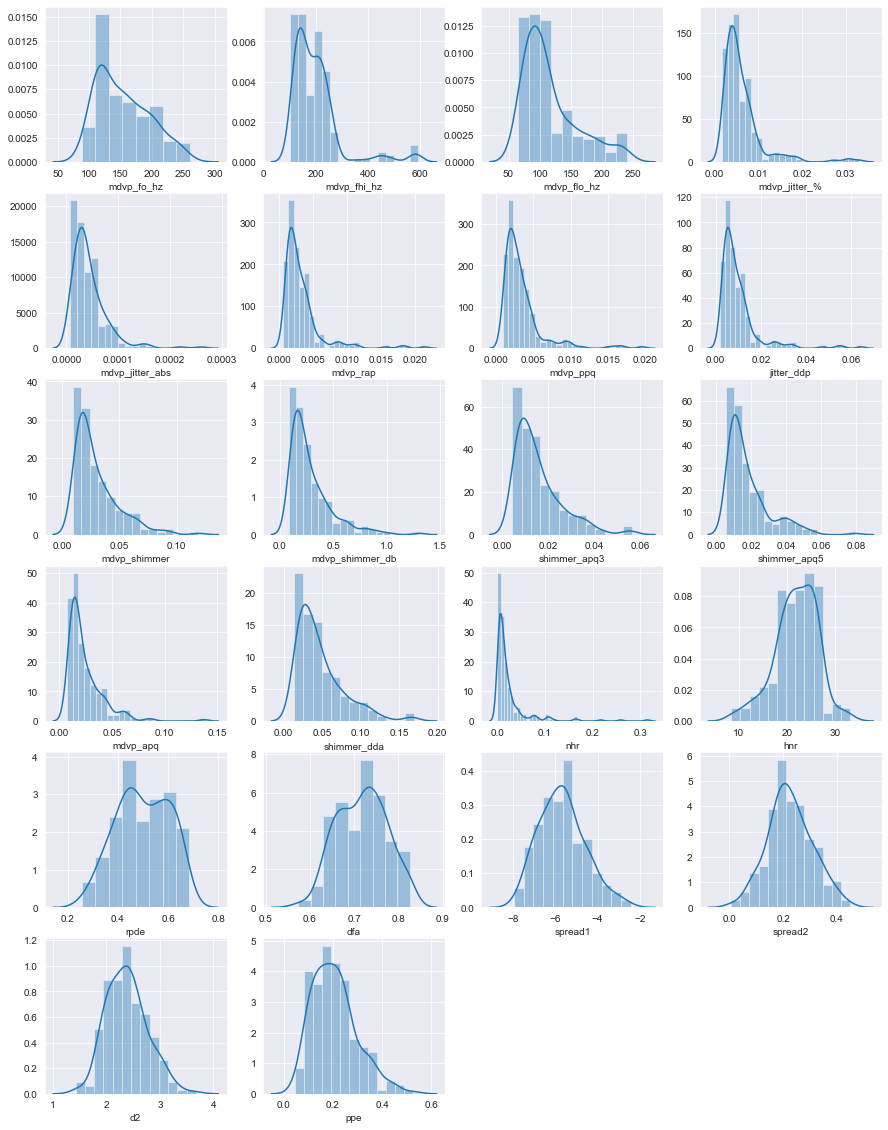

In [11]:
# Univarient Analysis
# Excluding 'status' column
sns.set_style(style='darkgrid')
col_names = df.columns.drop(['status', 'name'])

plt.figure(figsize = (15,20))
p = 1
for feature in col_names:
    plt.subplot(6,4,p)
    sns.distplot(df[feature], kde = True)
    p += 1
    

#### Univarient Analysis:
- Feartures like 'spread1', 'spread2', 'd2' prety much nomally distributed
- Fundamental frequency of voice, variation in amplitude and ratio of noise to tonal component in voice are skewed. Most of them are right skewed that means for few patients theses respective feature values are very high than their median values.

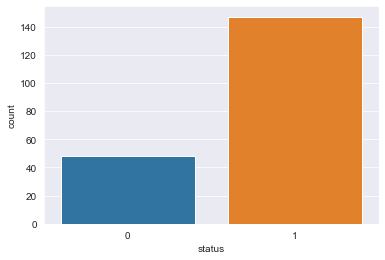

In [12]:
# Distribution of Target column- 'status'
sns.countplot(df['status'])

#### In this dataset around 75% of patients have Parkinson disease and rest  25% does not.

### Bi Variant Analysis:

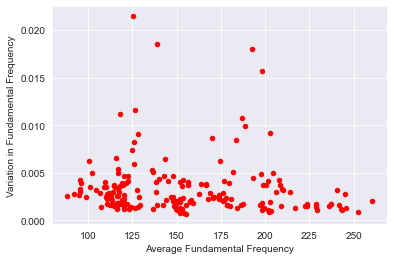

In [13]:
# Frequency Variation
df.plot.scatter(x = "mdvp_fo_hz", y = "mdvp_rap", c = 'red')
plt.xlabel("Average Fundamental Frequency")
plt.ylabel("Variation in Fundamental Frequency")
plt.show()

* Variation in fundamental frequency seems to be constant between 0.001 and 0.004. However, the varation becomes very high when average fundamental frquency is around 125 and betwen 175 to 200.


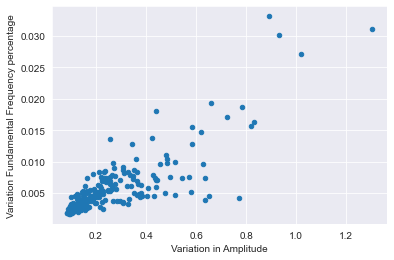

In [14]:
# Frequency variation with Amplitidue
df.plot.scatter(x = "mdvp_shimmer_db", y = "mdvp_jitter_%")
plt.xlabel("Variation in Amplitude")
plt.ylabel("Variation Fundamental Frequency percentage")
plt.show()

* Variation in amplitidue has linear relationship with the variation frequency in percentage. The majority values for variation in amplitidue lies between 0.1 to 0.4.

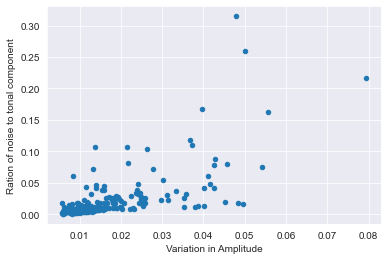

In [15]:
# Relationship b/w Variation with Noise to tonal component ration
df.plot.scatter(x = "shimmer_apq5", y = "nhr")
plt.xlabel("Variation in Amplitude")
plt.ylabel("Ration of noise to tonal component")
plt.show()

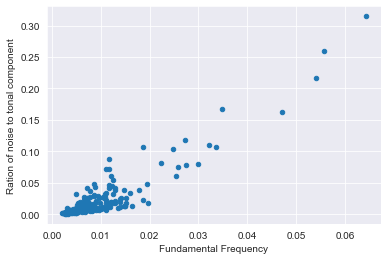

In [16]:
df.plot.scatter(x = "jitter_ddp", y = "nhr")
plt.xlabel("Fundamental Frequency")
plt.ylabel("Ration of noise to tonal component")
plt.show()

* The fundamental frequency and noise of tonal component ration has linear relationship but most of the values of fudamental frquency lies below 0.02.

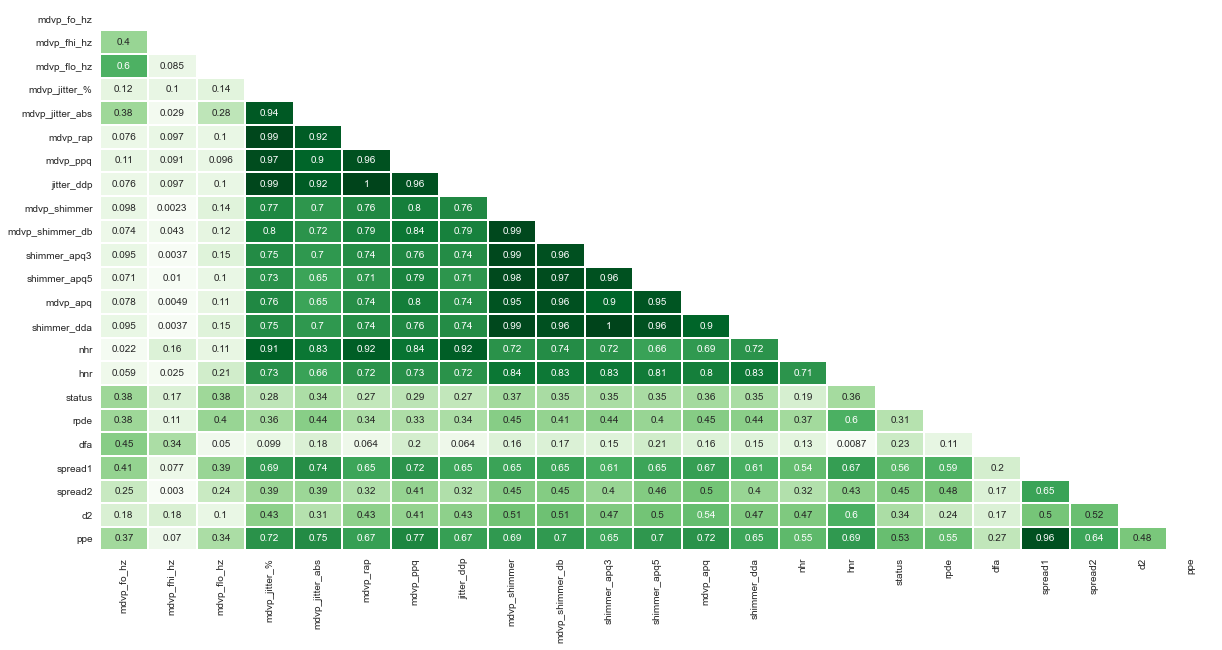

In [17]:
# Co-rellation/heatmap
cor = abs(df.corr()) # Corelational matrix
lower_triangle = np.tril(cor, k=-1)
mask = lower_triangle == 0
plt.figure(figsize = (20,10))
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Greens', annot= True, xticklabels = cor.index, 
            yticklabels = cor.columns, cbar= False, linewidths= 1, mask = mask)

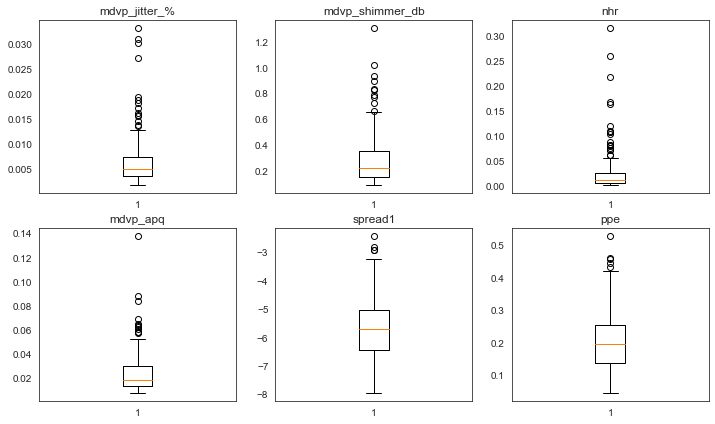

In [18]:
# Boxplot- Checking outliers

fig, axs = plt.subplots(2,3, figsize = (12,7))

axs[0,0].boxplot(df['mdvp_jitter_%'])
axs[0,0].set_title("mdvp_jitter_%")

axs[0,1].boxplot(df.mdvp_shimmer_db)
axs[0,1].set_title("mdvp_shimmer_db")

axs[0,2].boxplot(df.nhr)
axs[0,2].set_title("nhr")

axs[1,0].boxplot(df.mdvp_apq)
axs[1,0].set_title("mdvp_apq")

axs[1,1].boxplot(df.spread1)
axs[1,1].set_title("spread1")

axs[1,2].boxplot(df.ppe)
axs[1,2].set_title("ppe")

plt.show()

##### There are outliers for the above respective features. Since, we do not have much information or defined business problem in medicine, we will keep these extreme values as it is.

# Data Preprocessing

In [19]:
df.columns

Index(['name', 'mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_flo_hz', 'mdvp_jitter_%',
       'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe'],
      dtype='object')

In [20]:
# Target Columns
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [21]:
# Target column distribution
df['status'].value_counts(normalize = True)

1    0.753846
0    0.246154
Name: status, dtype: float64

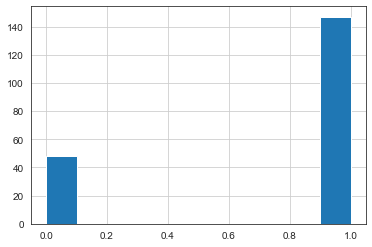

In [22]:
df['status'].hist()

In [23]:
# Seperating dependent and independent variables-
X = df.drop(["name", "status"], axis = 1)
y = df['status']

### Scaling/Normalizing Data

In [24]:
# Scaling data using Standar Scalar - 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

### Splitting Dataset

In [25]:
# Splitting dataset traning & testing into 70:30 ratio-
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

## Modeling

In [26]:
# Creating a user define function to fit differerent ML models:

def supervised_models(model_name, X_train, X_test, y_train, y_test):
    
    from sklearn import metrics
    
    model_name.fit(X_train, y_train) # Training on the train dataset
    
    predict = model_name.predict(X_test) # Predicting on test data
    
    accuracy = accuracy_score(y_test, predict) # accuracy on test data
    
    TN,FP,FN,TP = metrics.confusion_matrix(y_test, predict).ravel()
    
    recall = round(TP/(TP+FN), 3)
    precision = round(TP/(TP+FP), 3)
    specificity = round(TN/(TN+FP), 3)
    f1_score = round(2*recall*precision)/(recall+precision)
    
    return accuracy, recall, precision, specificity, f1_score
    

In [27]:
# Models
lr = LogisticRegression(solver = "liblinear")
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = supervised_models(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors = 3)
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = supervised_models(knn, X_train, X_test, 
                                                                                         y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = supervised_models(nb, X_train, X_test, y_train, y_test)

svm = LinearSVC()
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = supervised_models(svm, X_train, X_test,
                                                                                         y_train, y_test)

In [28]:
# Model performance summary

result = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.813559,0.925,0.822,0.579,1.144820
1,KNN,0.847458,0.975,0.830,0.579,1.108033
2,Naive Bayes,0.677966,0.600,0.889,0.842,0.671592
3,SVM,0.847458,0.925,0.860,0.684,1.120448


#### Among all the four models, kNN & SVM seems to give better accuracy. We'd check reliability after cross validation

## Meta Classifier

In [29]:
# Stacking - Meta Clasifier
from mlxtend.classifier import StackingCVClassifier

clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = GaussianNB()
clf3 = SVC()
lr = LogisticRegression()
clfs = [clf1, clf2, clf3]

stack = StackingCVClassifier(classifiers = clfs, meta_classifier = lr, random_state = 10)

for clf, label in zip([clf1, clf2, clf3, stack], ['kNN', 'Naive Bayes', 'SVM', 'Stacking']):
    score = cross_val_score(clf, X,y, cv = 3, scoring = 'accuracy')
    print("Accuracy: %0.2f [%s]" 
          % (score.mean(), label))
    

Accuracy: 0.75 [kNN]
Accuracy: 0.68 [Naive Bayes]
Accuracy: 0.75 [SVM]
Accuracy: 0.78 [Stacking]


#### We train a meta classifier- Stacking using previously used supervised models- to check the prediction accuracy after combining the models.

## Ensembling 

### Decision Tree 

In [30]:
# Original data without scaling
X0 = df.drop(["name", "status"], axis = 1)
y0 = df['status']

In [31]:
# Splitting dataset train test into 70:30 ration:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y0, test_size = 0.3, random_state = 1)

### For Ensemble techniques, it is not mandetory to scale the data.

In [32]:
# Applying Decision Tree with 'Gini'
d_tree = DecisionTreeClassifier(criterion = 'gini')

d_tree.fit(X0_train, y0_train) # Training the model

d_pred = d_tree.predict(X0_test) # Predicting the test data

d_accuracy = accuracy_score(y0_test, d_pred) # Accuracy on test data

d_cm = classification_report(y0_test, d_pred)

print(d_accuracy)
print(d_cm)

0.9152542372881356
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.93      0.95      0.94        40

    accuracy                           0.92        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.92      0.91        59



In [33]:
# Applying Decision Tree with 'entropy' and pruning
d_tree_prune = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)

d_tree_prune.fit(X0_train, y0_train) # Training the model

d_pred_prune = d_tree.predict(X0_test) # Predicting the test data

d_accuracy_prune = accuracy_score(y0_test, d_pred) # Accuracy on test data

d_cm_prune = classification_report(y0_test, d_pred)

print(d_accuracy_prune)
print(d_cm_prune)

0.9152542372881356
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.93      0.95      0.94        40

    accuracy                           0.92        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.92      0.91        59



In [34]:
# Feature Importance
print (pd.DataFrame(d_tree.feature_importances_, columns = ["Importance"], index = X.columns))

                 Importance
mdvp_fo_hz         0.124115
mdvp_fhi_hz        0.000000
mdvp_flo_hz        0.111564
mdvp_jitter_%      0.000000
mdvp_jitter_abs    0.000000
mdvp_rap           0.000000
mdvp_ppq           0.000000
jitter_ddp         0.000000
mdvp_shimmer       0.000000
mdvp_shimmer_db    0.000000
shimmer_apq3       0.000000
shimmer_apq5       0.000000
mdvp_apq           0.000000
shimmer_dda        0.126314
nhr                0.000000
hnr                0.118238
rpde               0.000000
dfa                0.000000
spread1            0.000000
spread2            0.000000
d2                 0.041522
ppe                0.478247


The important features that contributes to the performance of the model are following: Average and Maximum fundamental frequency, shimmer_dda, noise to tonal ration, spread2, ppe.        

### Random Forest

In [35]:
# Random Forest
r_forest = RandomForestClassifier()

r_forest.fit(X0_train, y0_train) # Training the model

forest_pred = r_forest.predict(X0_test) # Predicting test data

forest_accuracy = accuracy_score(y0_test, forest_pred)

forest_report = classification_report(y0_test, forest_pred)

print(forest_accuracy)

print(forest_report)

0.864406779661017
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       0.83      1.00      0.91        40

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59



In [36]:
# Random Forest- Parameter Tuning
r_forest = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', min_samples_leaf = 3)

r_forest.fit(X0_train, y0_train) # Training the model

forest_pred = r_forest.predict(X0_test) # Predicting test data

forest_accuracy = accuracy_score(y0_test, forest_pred)

forest_report = classification_report(y0_test, forest_pred)

print(forest_accuracy)

print(forest_report)

0.8135593220338984
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.80      0.97      0.88        40

    accuracy                           0.81        59
   macro avg       0.85      0.72      0.75        59
weighted avg       0.83      0.81      0.79        59



### Ada Boosting

In [37]:
# Ada Boosting
ab = AdaBoostClassifier(n_estimators = 10)

ab.fit(X0_train, y0_train) # Training the model

ab_pred = ab.predict(X0_test) # Predicting test data

ab_accuracy = accuracy_score(y0_test, ab_pred)

ab_report = classification_report(y0_test, ab_pred)

print(ab_accuracy)

print(ab_report)


0.8305084745762712
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.86      0.90      0.88        40

    accuracy                           0.83        59
   macro avg       0.81      0.79      0.80        59
weighted avg       0.83      0.83      0.83        59



### Gradient Boosting

In [38]:
# Gradient Boosting 
gbc = GradientBoostingClassifier()

gbc.fit(X0_train, y0_train) # Training the model

gbc_pred = gbc.predict(X0_test) # Predicting test data

gbc_accuracy = accuracy_score(y0_test, gbc_pred)

gbc_report = classification_report(y0_test, gbc_pred)

print(gbc_accuracy)

print(gbc_report)

0.864406779661017
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.86      0.95      0.90        40

    accuracy                           0.86        59
   macro avg       0.87      0.82      0.83        59
weighted avg       0.86      0.86      0.86        59



In [39]:
# Gradient Boosting 
gbc = GradientBoostingClassifier(loss = 'deviance', n_estimators = 50)

gbc.fit(X0_train, y0_train) # Training the model

gbc_pred = gbc.predict(X0_test) # Predicting test data

gbc_accuracy = accuracy_score(y0_test, gbc_pred)

gbc_report = classification_report(y0_test, gbc_pred)

print(gbc_accuracy)

print(gbc_report)

0.8813559322033898
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.88      0.95      0.92        40

    accuracy                           0.88        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.88      0.88      0.88        59



### XGBoost

In [40]:
# conda install -c anaconda py-xgboost

In [41]:
from xgboost import XGBClassifier 

# Data is with saling

xgb = XGBClassifier()

xgb.fit(X_train, y_train) # Training the model

xgb_pred = xgb.predict(X_test) # Predicting test data

xgb_accuracy = accuracy_score(y_test, xgb_pred)

xgb_report = classification_report(y_test, xgb_pred)

print(xgb_accuracy)

print(xgb_report)


0.8813559322033898
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



### Model Performance Using KFold

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, random_state=40) 

# Since our datase is very small, it is better to use lower k fold value. I've tried differnt K fold values but finally 
# decide to use k=3. 

lr_kfold = LogisticRegression()
lr_result = cross_val_score(lr_kfold, X_scaled, y, cv=kfold)

knn_kfold = KNeighborsClassifier(n_neighbors = 3)
knn_result = cross_val_score(knn_kfold, X_scaled, y, cv=kfold)

nb_kfold = GaussianNB()
nb_result = cross_val_score(nb_kfold, X_scaled, y, cv=kfold)

svm_kfold = SVC()
svm_result = cross_val_score(svm_kfold, X_scaled, y, cv=kfold)

dt_kfold = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)
dt_result = cross_val_score(dt_kfold, X0, y0, cv=kfold)

rf_kfold = RandomForestClassifier()
rf_result = cross_val_score(rf_kfold, X0, y0, cv=kfold)

ab_kfold = AdaBoostClassifier()
ab_result = cross_val_score(ab_kfold, X0, y0, cv=kfold)

gb_kfold = GradientBoostingClassifier()
gb_result = cross_val_score(gb_kfold, X0, y0, cv=kfold)

xgb_kfold = XGBClassifier()
xgb_result = cross_val_score(xgb_kfold, X_scaled, y, cv=kfold) # Scaling is applied for XGBoost

### Model Comparison and Conclusion

In [43]:
models = ["Logistic", "kNN", "Naive Bayes", "SVM", "Decision Tree", "Random Forest",
                                      "AdaBoost", "Gradient Boosting", "XGBoost"]
model_result = [lr_result, knn_result, nb_result, svm_result, dt_result, rf_result, ab_result, gb_result, xgb_result]

for i in range(len(model_result)):
    model_result[i]=np.mean(model_result[i])*100


model_result = ['%.2f' % elem for elem in model_result]  

In [44]:
result_final = pd.DataFrame({'Model': models,
                            "Accuracy": model_result})
result_final

,Model,Accuracy
0,Logistic,76.92
1,kNN,80.51
2,Naive Bayes,68.21
3,SVM,81.03
4,Decision Tree,77.44
5,Random Forest,78.46
6,AdaBoost,76.41
7,Gradient Boosting,78.97
8,XGBoost,81.54


### Conclusion:  After running multiple iteration for various alogoriths and trying different Kfold values, kNN, SVM, Gradient Boosting and XGBoosting gives very clsoer accuracy. However, XGBoosting is to be considered as more reliable model here. 